<a href="https://colab.research.google.com/github/chernandezrojas1991/exercises-u3-dl/blob/main/analysis_k_means_find_k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [29]:
path = "/content/drive/MyDrive/Coding Dojo/Unsupervised ML/Semana 1/cust_seg.csv"
df = pd.read_csv(path)
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [30]:
df.columns

Index(['Unnamed: 0', 'Customer Id', 'Age', 'Edu', 'Years Employed', 'Income',
       'Card Debt', 'Other Debt', 'Defaulted', 'DebtIncomeRatio'],
      dtype='object')

In [31]:
df.drop(['Unnamed: 0', 'Customer Id'], axis = 1, inplace = True)

In [32]:
df.dropna(inplace = True)

In [33]:
#Escalar datos
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(df)

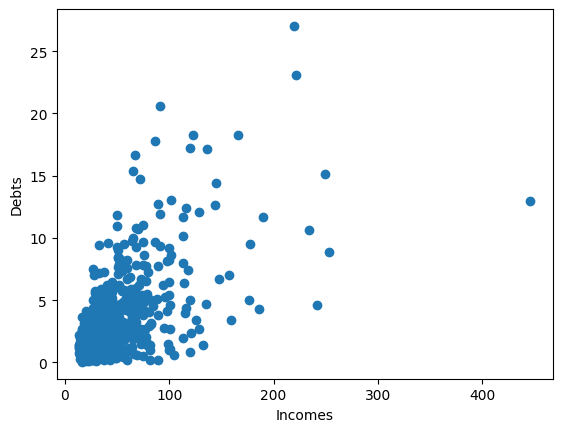

In [34]:
plt.scatter(df['Income'], df['Other Debt'])
plt.xlabel('Incomes')
plt.ylabel('Debts');

In [35]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

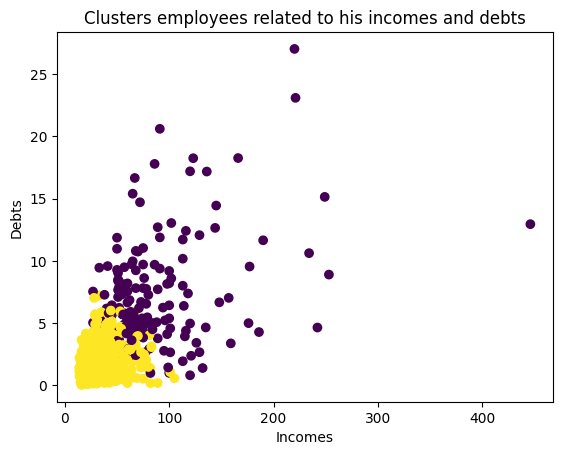

In [36]:
# Save the cluster labels to the dataframe
df['cluster'] = kmeans.labels_
# Visualize the clusters
plt.scatter(df['Income'], df['Other Debt'], c = df['cluster'])
plt.xlabel('Incomes')
plt.ylabel('Debts')
plt.title('Clusters employees related to his incomes and debts');

Método del codo de inercia

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'inertia')

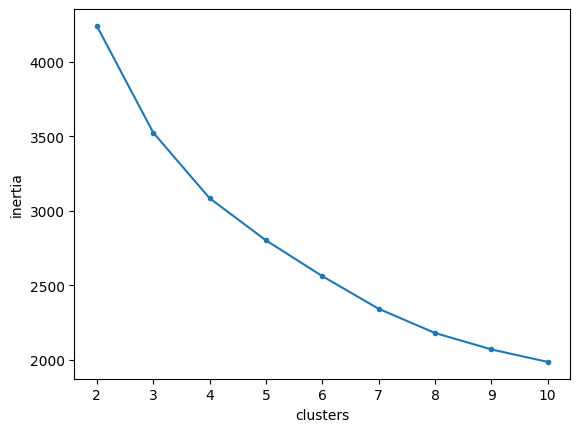

In [37]:
inertias = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df)
    inertias.append(kmeans.inertia_)
#Visualize scores
plt.plot(range(2,11), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')

Score de Silueta

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

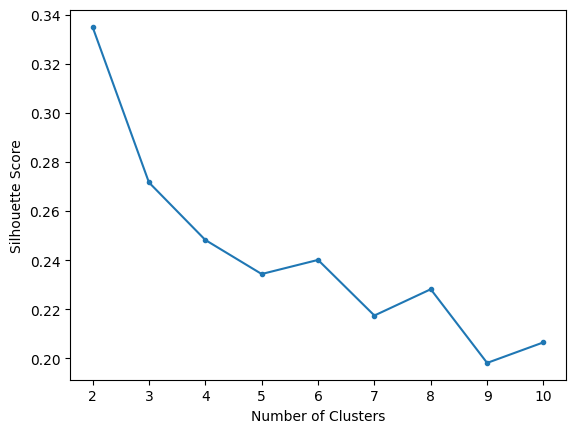

In [38]:
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

El método del codo y la silueta, ambos apuntan a una cantidad óptima de clústers igual a 3.

El valor escogido para los siguientes pasos será número de clústers igual a 3.

In [39]:
# Fit kmeans model with 3 clusters and display the silhouette score
kmeans = KMeans(n_clusters = 3)
kmeans.fit(scaled_df)
silhouette_score(scaled_df, kmeans.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.27163714546797385

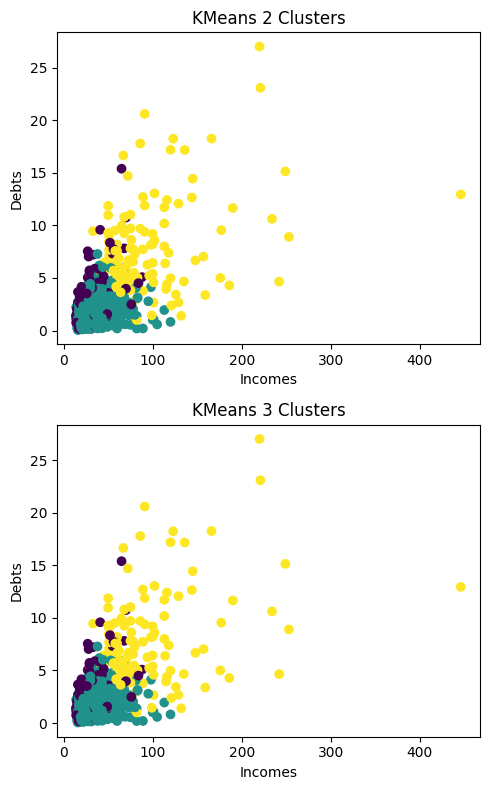

In [40]:
# Save the cluster labels to the dataframe
df['cluster2'] = kmeans.labels_
df['cluster3'] = kmeans.labels_
# Visualize the clusters
fig, axes = plt.subplots(2,1, figsize=(5,8))
axes[0].scatter(df['Income'], df['Other Debt'], c = df['cluster2'])
axes[0].set_xlabel('Incomes')
axes[0].set_ylabel('Debts')
axes[0].set_title('KMeans 2 Clusters')
axes[1].scatter(df['Income'], df['Other Debt'], c = df['cluster3'])
axes[1].set_xlabel('Incomes')
axes[1].set_ylabel('Debts')
axes[1].set_title('KMeans 3 Clusters')
plt.tight_layout();

Al agrupar por 3 clústers, se da cuenta que existen dos clústers aglutinados (muy juntos) con ingreso no mayor a 100 y deudas sobrepasando las 5 unidades (sea cual sea su moneda y escala). Por otro lado, el clúster denotado por el color amarillo, tiene mayor variación y dispersión, concentrándose en gran medida con un ingreso menor y superior a 100 cuyas deudas exceden las 5 unidades.

# Parte 2

Gráficos de barra del promedio de variable

In [41]:
# Scale the data
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
X_scaled.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster,cluster2,cluster3
0,0.768304,0.298793,-0.359007,-0.723102,-0.675699,-0.604284,-0.594950,-0.580528,0.542126,0.080720,0.080720
1,1.519090,-0.779325,2.647029,1.478707,1.431421,1.570620,-0.594950,0.372222,-1.844591,1.650274,1.650274
2,-0.232744,0.298793,0.242201,0.309845,2.154119,0.835201,1.680814,1.559495,-1.844591,-1.488834,-1.488834
3,-0.733267,0.298793,-0.659610,-0.723102,-0.412427,-0.773833,-0.594950,-0.580528,0.542126,0.080720,0.080720
4,1.519090,-0.779325,3.398538,5.637681,3.665215,1.780653,-0.594950,-0.448609,-1.844591,1.650274,1.650274


In [42]:
# Refit KMeans with 4 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster,cluster2,cluster3
0,41,2,6,19,0.124,1.073,0.0,6.3,0,1,1
1,47,1,26,100,4.582,8.218,0.0,12.8,1,2,2
2,33,2,10,57,6.111,5.802,1.0,20.9,2,0,0
3,29,2,4,19,0.681,0.516,0.0,6.3,0,1,1
4,47,1,31,253,9.308,8.908,0.0,7.2,1,2,2


In [43]:
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster2,cluster3
0,0,33.616915,1.599502,7.405473,35.111940,0.752567,1.693167,0.000000,7.518657,1.000000,1.000000
1,1,42.613139,1.934307,16.795620,94.145985,3.980759,7.443540,0.189781,13.986861,1.912409,1.912409
2,2,31.366460,1.850932,3.689441,30.484472,1.488199,2.734901,0.975155,13.936025,0.000000,0.000000


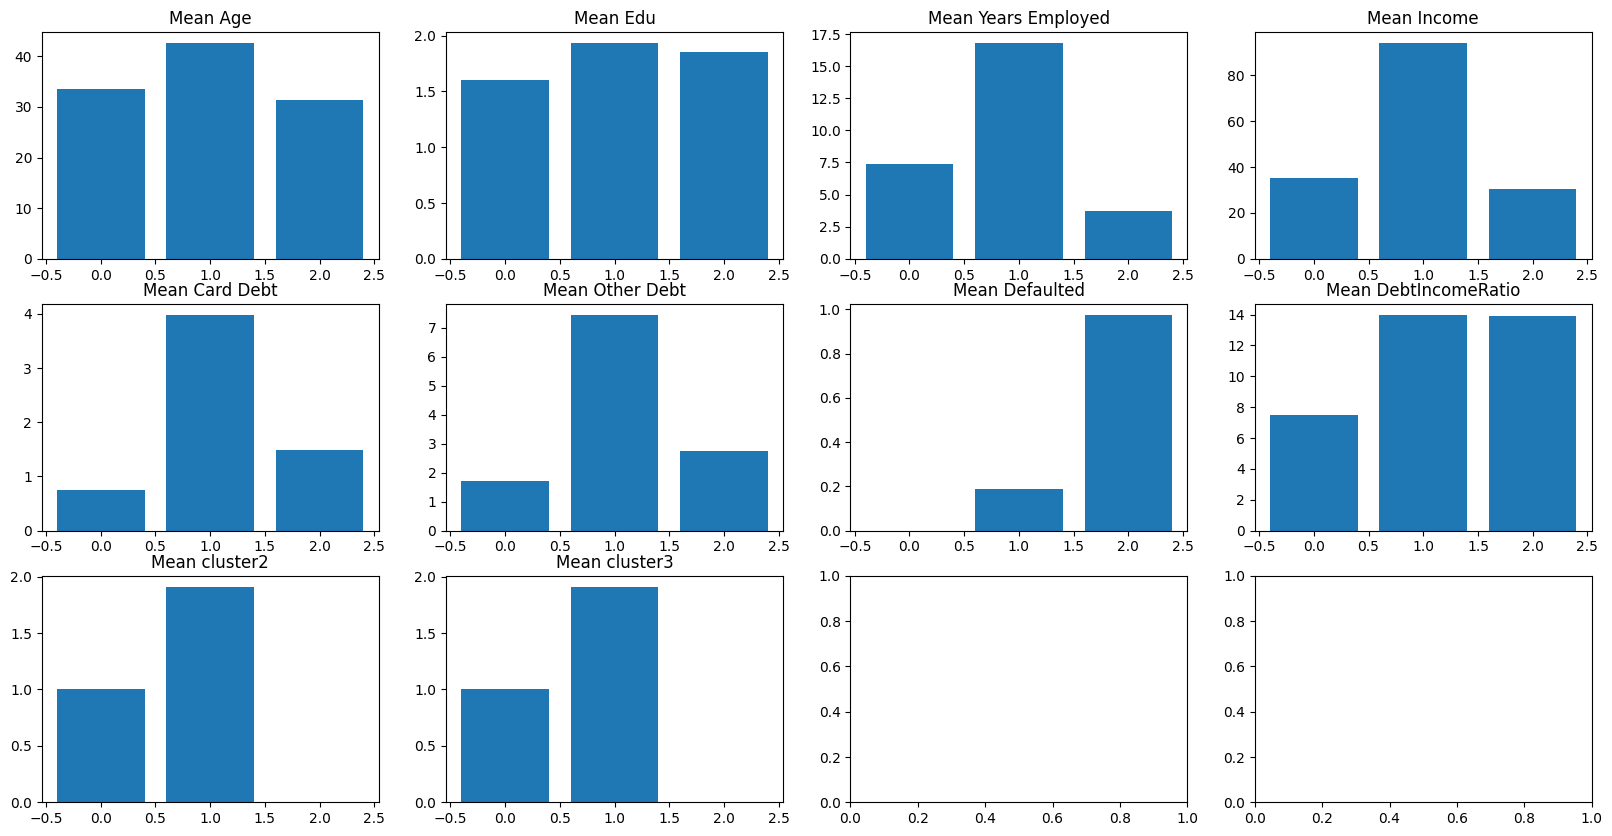

In [44]:
# Visualize means
fig, axes = plt.subplots(3,4, figsize = (20, 10))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

1er clúster: púrpura
2do clúster: celeste
3er clúster: amarillo

- El promedio de edades fluctúan entre los 30 y 40 años.
- El promedio de años en la empresa por parte de los empleados es aproximadamente 17 años. Además, aquellos que llevan mayor tiempo en la empresa son aquellos con mayores ingresos, mientras que los que llevan menos tienen menos ingresos.
- Aquellos empleados con mayores ingresos tienen mayores deudas a modo general (abarba de tarjeta y otras deudas).

Recapitulando el análisis de promedios, los empleados con mayor edad y años de trabajo en la empresa, son aquellos que tienen mayores ingresos y deudas.